<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate mask recognition.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
# Import all necessary libraries.
import sys
import os
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load default configuration file.
NOMEROFF_NET_DIR = "../"
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, "Mask_RCNN/")

MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, "logs/")
MASK_RCNN_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/mask_rcnn_numberplate_0700.h5")

sys.path.append(NOMEROFF_NET_DIR)

In [3]:
# Import license plate recognition tools.
from NomeroffNet import Detector, filters

Using TensorFlow backend.


In [4]:
# Initialize the detector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)

In [5]:
# Load weights in keras format.
nnet.loadModel(MASK_RCNN_MODEL_PATH)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


The nnet.detect method is passed an array of image paths that are processed simultaneously. If you have a GPU, change the IMAGES_PER_GPU parameter in the configuration and pass the specified number of images to the function, this will significantly increase the recognition speed.
More about the returned detect method object [here](https://github.com/ria-com/nomeroff-net/blob/master/docs/MASK_RCNN_RETURNS_OBJECT.md/ "More about the returned detect method object").

1.0


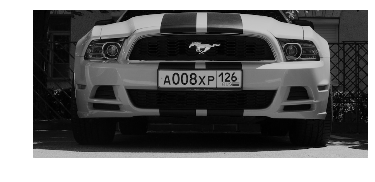

255


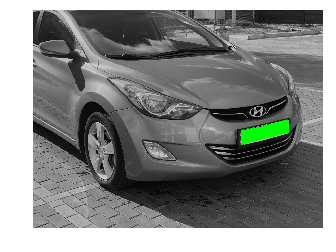

255


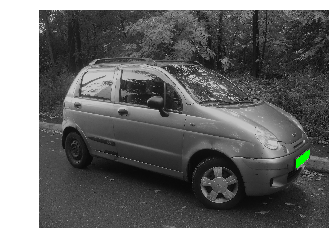

255


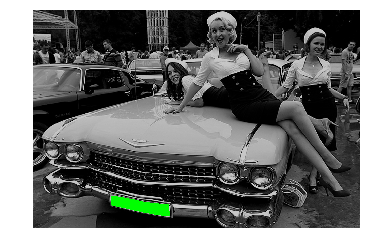

1.0


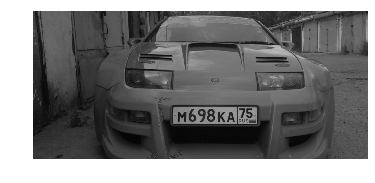

1.0


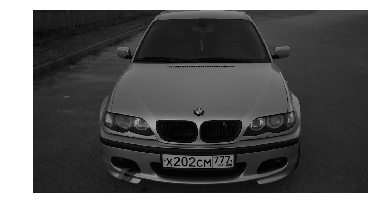

255


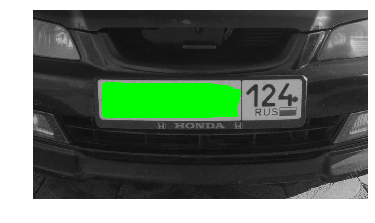

255


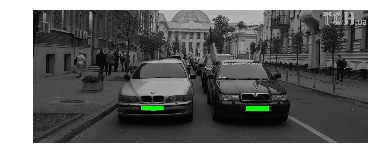

1.0


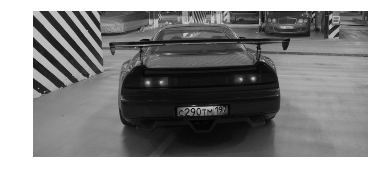

1.0


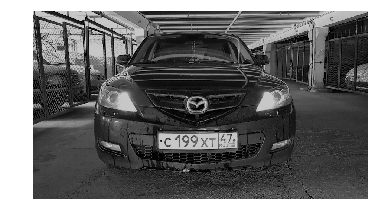

In [10]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'images/'

for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        img = mpimg.imread(img_path)
        
        np = nnet.detect([img])
    
        # Generate splashs.
        splashs = filters.color_splash(img, np)
        for splash in splashs:
            plt.imshow(splash)
            plt.axis("off")
            plt.show()